In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

# <span style="color:red;"><center> TP - Observer les données HTTP échangées entre client et serveur</span>

Pour terminer ce chapitre, nous voudrions pouvoir observer les **données échangées entre le client et le serveur dans le cadre du protocole HTTP**.

## 1. Observation réelle

Comme nous l'avons vu à la toute fin du TD précédent, **tous les navigateurs possèdent une fonction** *Inspecter* ou *Inspecter l'élément*, généralement accessible grâce à la **touche** *F12*.

Dans la fenêtre qui s'ouvre, il suffit alors de **sélectionner l'onglet** *Réseau* puis de **rafraichir la page** pour voir apparaître **dans le moniteur réseau toutes les requêtes HTTP effectuées par le navigateur**.

On obtient quelque chose comme ça :
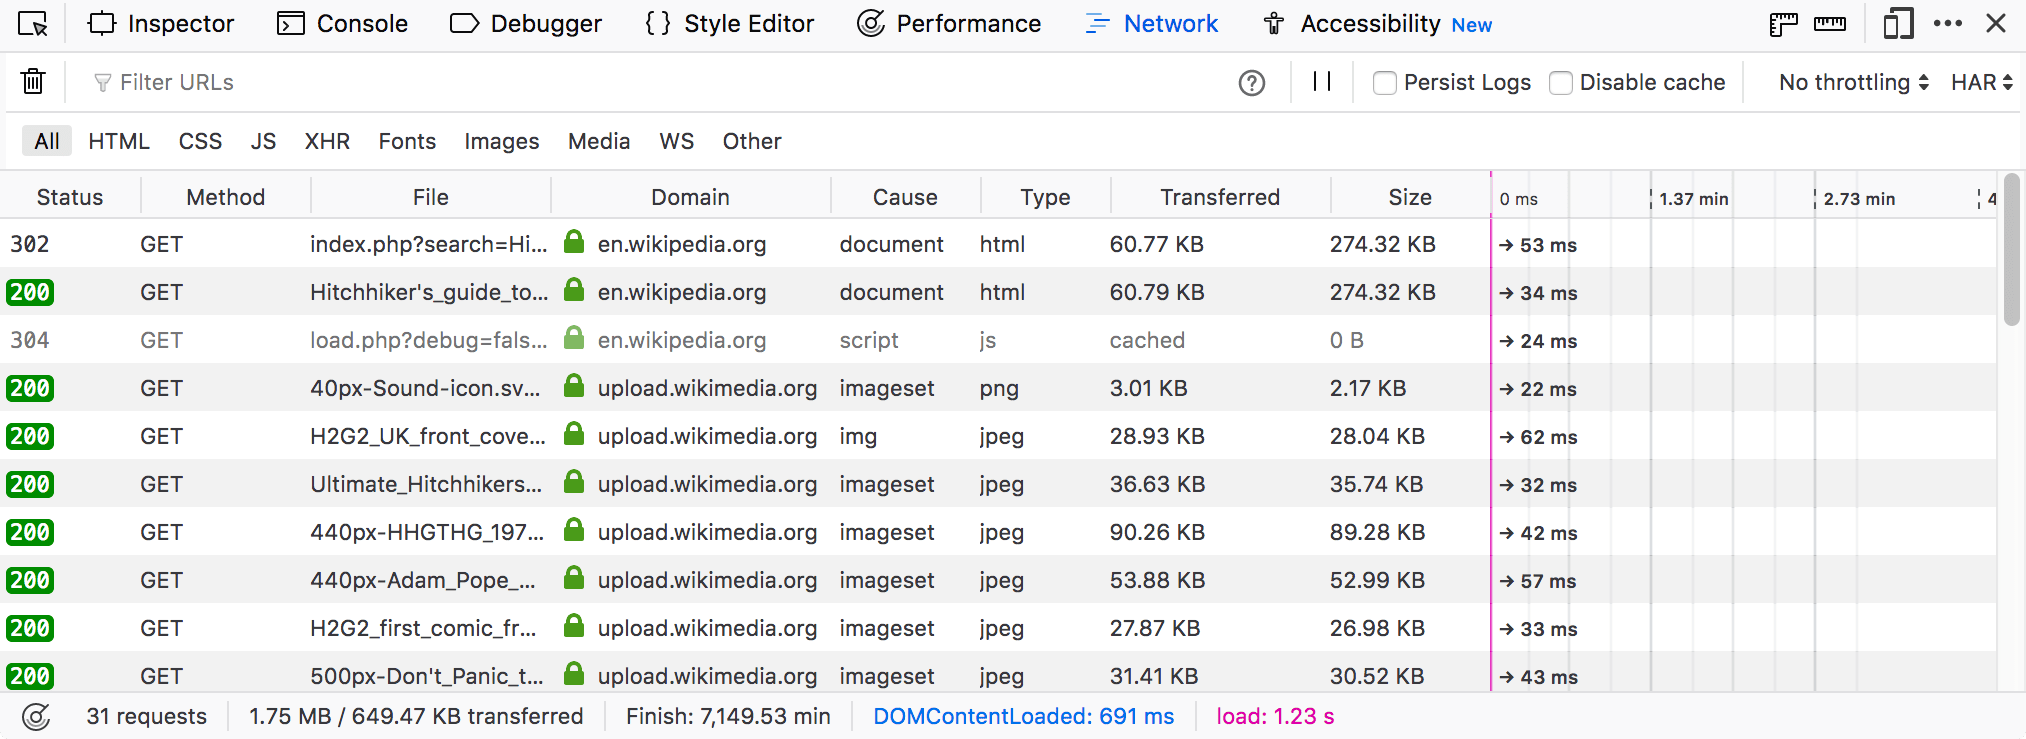

En particulier, on voit bien **pour chaque requête** :
- la **méthode** utilisée,
- le **statut** de sa réponse,
- le **nom du serveur** concerné,
- le **type de ressource** concernée et son **nom**
- ainsi que le **temps de réponse**.

**Après avoir ouvert le moniteur réseau**, cliquer sur les liens suivants et observer le **nombre de requêtes envoyées**, les **méthodes utilisées** et le **statut des réponses** :
- http://perdus.com/
- https://www.qwant.com/
- https://www.google.com/
- https://www.atrium-sud.fr/

Vous devriez observer que si le **premier lien** ne nécessite qu'**une seule requête**, la page d'accueil de *google* demande d'en envoyer déjà **plus de 30** à partir du moment où vous cliquez dans la barre de recherche et celle d'*Atrium* **plus de 150** !

Vous constaterez aussi qu'en **temps normal**, toutes les requêtes ont le **statut** *200* et que la **méthode** *GET* est bien **ultra majoritaire**.

A présent, tapez l'adresse http://www.perdu.com/ **dans le moteur de recherche Qwant** et cliquez sur le **premier lien proposé**, vous devriez arriver sur le **même site que précédemment**.

Mais si vous **cliquez sur la première requête** qui permet de charger la page (il y en a peut être une plus que la première fois pour récupérer une icône) afin de **visualiser son en-tête**, vous pouvez voir que le champ *Referer* indique que **vous êtes passé par Qwant pour arriver là**.

Evidemment, ça marche aussi en passant par Google.

## 2. Observation sur une simulation de réseau

**Visionner** la [video suivante](https://youtu.be/fY2yiRXMdS8).

Puis, à l'aide du logiciel *Filius*, **reproduire les manipulations** présentées dans la vidéo. Il faut **double-cliquer** sur les machines pour les **configurer** et faire un **clic droit** sur le client pour pouvoir **afficher les données échangées**.

A la fin, vous devriez obtenir l'équivalent de l'**image ci-dessous**.

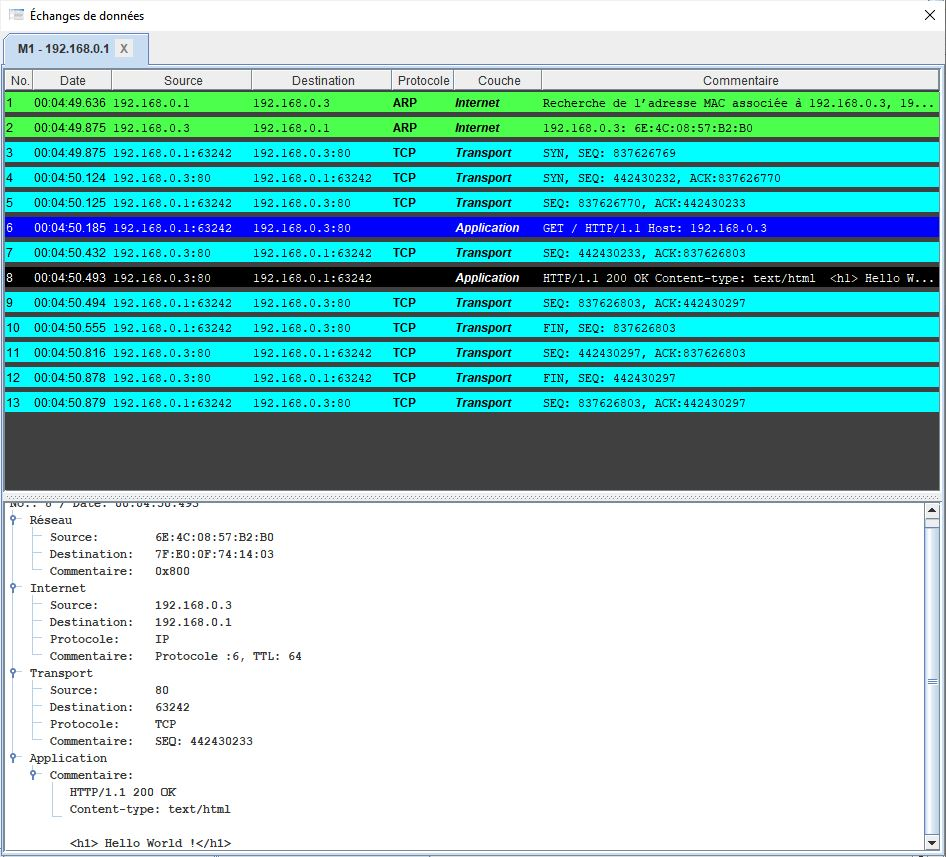

On voit que **12 trames ont été échangées sur le réseau entre le client M1 et le serveur M3**. La plupart concerne la couche *Transport* et le protocole *TCP*.

Les **trames 6 et 8** nous intéressent particulièrement car elles concernent la **couche application**. Or le **seul logiciel** actif sur le réseau a été notre **navigateur web**, il doit donc s'agir de données concernant le **protocole HTTP**.

Et en effet, en cliquant sur la **trame 8** (comme sur l'image ci-dessus), on peut accèder au détail et on voit que la **partie application** de cette trame est bien une **réponse HTTP** du serveur qui contient le **code HTML demandé par le navigateur**.

La **trame 6** contient la **requête HTTP** correpondante, **cliquez dessus** pour voir les détails.

Libre à vous de développer le réseau ou votre page web dans *Filius* pour pousser plus loin les tests ...